# Bounding Box Distributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import string


In [2]:
## read in data info
bbx_list = pd.read_csv(f'/home/gridsan/vdutell/RosenholtzLab_shared/cocop_bbx_fixations.csv')
bbx_list

,image_name,object_name,index,bbx_x_16,bbx_y_16,bbx_w_16,bbx_h_16,used,imsize_x_16,imsize_y_16,...,fx_x_22_5,fx_y_22_5,fx_x_16_10,fx_y_16_10,fx_x_22_10,fx_y_22_10,fx_x_16_15,fx_y_16_15,fx_x_22_15,fx_y_22_15
0,000000001268.jpg,cell phone,8,529,181,30,19,1,640,427,...,637.556549,273.051293,384.836820,206.342648,528.113098,284.102586,305.255230,214.513972,418.669648,295.153879
1,000000009769.jpg,fire hydrant,2,552,259,12,21,1,640,480,...,657.813854,356.643897,399.174705,249.647338,548.627708,343.287793,319.762057,239.971007,439.441562,329.931690
2,000000011197.jpg,bicycle,1,554,162,48,29,1,640,427,...,686.075084,258.341537,419.620382,198.713356,577.150169,273.683075,340.430573,210.070034,468.225253,289.024612
3,000000013546.jpg,skateboard,3,510,209,40,50,1,640,425,...,618.553460,309.979341,370.870843,217.329326,509.106920,298.958683,291.306264,208.993990,399.660380,287.938024
4,000000016439.jpg,wine glass,2,412,262,43,91,1,640,480,...,500.407607,365.854838,295.373142,225.398235,405.815214,309.709676,226.559714,184.597352,311.222822,253.564514
5,000000018150.jpg,bottle,1,275,230,34,57,1,640,480,...,493.606705,295.636727,426.588556,171.478785,586.213411,236.273455,493.882834,128.218178,678.820116,176.910182
6,000000018380.jpg,vase,40,514,88,11,30,1,640,426,...,617.809599,194.361098,378.969194,180.403963,521.619199,247.722196,308.953792,219.105944,425.428798,301.083295
7,000000019042.jpg,bird,1,308,165,21,40,1,640,371,...,536.386991,303.193496,478.000000,185.000000,634.773982,352.386991,558.000000,185.000000,733.160973,401.580487
8,000000061108.jpg,dog,1,137,179,114,137,1,640,480,...,375.818787,333.688575,353.753657,238.124797,485.637573,327.377151,433.630485,233.687195,595.456360,321.065726
9,000000061268.jpg,person,2,54,276,25,57,1,640,424,...,194.273206,381.123294,216.435997,249.511371,297.546413,343.246588,291.653996,222.267057,400.819619,305.369882


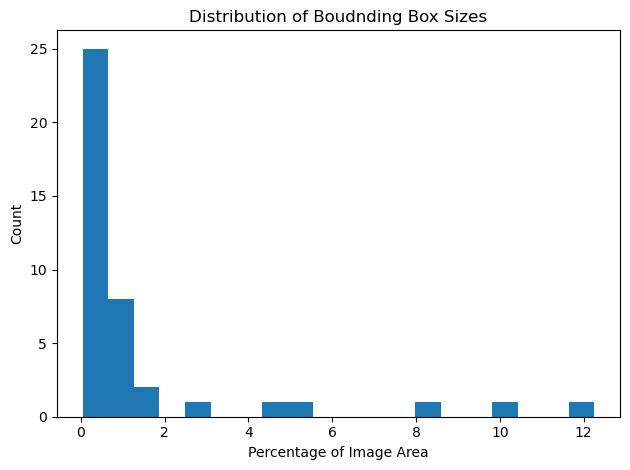

In [3]:
bbx_list['bbx_area'] = bbx_list['bbx_w_16']*bbx_list['bbx_h_16']
bbx_list['img_area'] = bbx_list['imsize_x_16']*bbx_list['imsize_y_16']
ims = np.array(bbx_list['img_area'])
bbas = np.array(bbx_list['bbx_area'])
bbas_relative = bbas/ims * 100.
#plt.plot(bbas,bbas_relative,'.')
plt.hist(bbas_relative,bins=20)
plt.title("Distribution of Boudnding Box Sizes")
plt.ylabel('Count')
plt.xlabel('Percentage of Image Area')
plt.tight_layout()

In [4]:
bbx_list[['image_name','bbx_area']].sort_values('bbx_area')

,image_name,bbx_area
22,000000203864.jpg,130
1,000000009769.jpg,252
19,000000142238.jpg,272
6,000000018380.jpg,330
27,000000226417.jpg,400
40,000000579635.jpg,408
32,000000481390.jpg,462
0,000000001268.jpg,570
16,000000120572.jpg,656
30,000000377635.jpg,689
